## Team
Sulayman Adewale
Fisayo Jassey-Jabarr


Project Overview:
Introduction

        A. Objectives
        B. Data description
    
Importing Libraries and Reading Data
    
    Exploratory Data Analysis
    
        A. Basic Data Exploration
        B. Principal Component Analysis (PCA) (not require due low data)
        C. Data Visualization and Exploratory Analysis
            - Multivariate
            - Univariate and Bivariate Analysis
        
Feature Engineering
            
            A. Data Transformation
            
            B. Feature Extraction
        
Model Building

            A. Model Training and Evaluation

### Indrouction 

   this is comprehensive analysis of electric vehicle (EV) adoption across 15 countries,
        examining market shares,
        infrastructure development, 
        policy effectiveness, and barriers to adoption. 
        
    The analysis combines statistical modeling with case studies to provide actionable recommendations.
    
with main focuse on answer the follwoing Key Research Questions

        How can EV sales be improved in different regions, specifically Europe, China, and the USA?
    
        What are the current barriers to EV adoption (e.g., lack of infrastructure, affordability)?
        
        Which government policies have the greatest impact on accelerating EV adoption?
        
        How do factors like affordability and charging infrastructure affect market growth?
    

### B) Data Description:  
  
The dataset used in this project is "Global EV Adoption Data" containing electric vehicle market statistics across multiple countries.

The key performance indicator (target variable) is "Market_Share_2023," representing the percentage of EVs in total vehicle sales for each country.
The following attributes represent the independent variables:

Country: The name of the country being analyzed.

Total_EV_Stock: The total number of electric vehicles in the country, ranging from 140,000 to 13.2 million.

Charging_Points: Number of public charging stations available, varying from 8,500 to 1,760,000 points.

Policy_Support: List of government policies supporting EV adoption (e.g., tax exemptions, subsidies, incentives).

Challenges: Documented barriers to EV adoption in each country.

Region: Geographic classification (Europe, Asia, or North America).

Avg_Price_Entry_EV: The average price of entry-level EVs in USD, ranging from $25,000 to $45,000.

Infrastructure_Score: A score from 1-100 rating the quality and coverage of charging infrastructure.

GDP_Per_Capita: Economic indicator showing average income per person in USD.

Derived metrics include:

EVs_per_Charging_Point: Ratio of total EVs to available charging points.
Market_Maturity_Score: Composite score combining market share, infrastructure, and economic factors.
Market_Penetration: Ratio of EV stock to population/GDP.
    
Dataset Characteristics

Scope: 15 countries' EV market data (2023)

Regions: Europe (10), Asia (3), North America (2)

Features: 12 primary variables + 3 derived metrics

Data Types: Numerical, categorical, and text data


### Importing Libraries and Reading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, silhouette_score
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_regression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture

In [ ]:
### Loading the dataset (creating from sctrach)

In [2]:
def generate_ev_dataset():
    # Create dataset with real-world statistics
    ev_data = {
        'Country': [
            'Norway', 'China', 'Germany', 'United States', 'France', 
            'United Kingdom', 'Netherlands', 'Sweden', 'Japan', 'Canada',
            'South Korea', 'Denmark', 'Switzerland', 'Italy', 'Spain'
        ],
        'Market_Share_2023': [
            81.9, 29.7, 17.8, 7.6, 16.8, 
            16.5, 23.2, 32.5, 3.4, 8.9,
            6.4, 31.8, 19.7, 4.2, 5.1
        ],
        'Total_EV_Stock': [
            650000, 13200000, 1800000, 3100000, 950000,
            880000, 450000, 520000, 410000, 350000,
            300000, 180000, 150000, 170000, 140000
        ],
        'Charging_Points': [
            18900, 1760000, 90000, 140000, 75000,
            42000, 85000, 25000, 29000, 16500,
            19000, 8500, 9000, 23000, 15000
        ],
        'Policy_Support': [
            'Tax exemptions, Free parking, Bus lane access, Purchase incentives',
            'Purchase subsidies, Manufacturing incentives, City-level incentives, Infrastructure support',
            'Purchase incentives, Tax benefits, Free parking in cities, Infrastructure grants',
            'Federal tax credit, State rebates, HOV lane access, Infrastructure funding',
            'Purchase bonus, Scrappage scheme, Tax benefits, Charging installation support',
            'Purchase grants, Company car tax benefits, Infrastructure grants, Clean air zones',
            'Purchase subsidies, Tax benefits, Free parking, Infrastructure support',
            'Bonus-malus system, Tax reduction, Charging support, Company car benefits',
            'Purchase subsidies, Tax exemptions, Infrastructure support, Regional incentives',
            'Federal incentives, Provincial rebates, Infrastructure grants, HOV lane access',
            'Purchase subsidies, Tax reduction, Infrastructure support, Regional incentives',
            'Tax exemptions, Infrastructure support, Free parking, Purchase incentives',
            'Import tax exemption, Charging support, Regional incentives, Tax benefits',
            'Purchase incentives, Infrastructure support, Regional benefits, Tax reduction',
            'Purchase incentives, Tax benefits, Infrastructure grants, Regional support'
        ],
        'Challenges': [
            'Rural charging coverage, Grid capacity',
            'Urban charging congestion, Grid stability, Rural coverage',
            'Grid capacity, Installation delays, Urban charging access',
            'Range anxiety, Rural coverage, Grid capacity, Installation costs',
            'Charging infrastructure, Grid capacity, Urban installation',
            'Urban charging access, Grid capacity, Installation permits',
            'Grid capacity, Urban charging density, Installation permits',
            'Rural coverage, Grid capacity, Winter performance',
            'Limited model availability, Charging infrastructure, Cost',
            'Weather impact, Rural coverage, Grid capacity',
            'Urban charging access, Cost barriers, Limited models',
            'Grid capacity, Rural coverage, Installation costs',
            'Grid stability, Urban charging access, Cost barriers',
            'Limited infrastructure, Cost barriers, Model availability',
            'Infrastructure gaps, Cost barriers, Limited incentives'
        ],
        'Region': [
            'Europe', 'Asia', 'Europe', 'North America', 'Europe',
            'Europe', 'Europe', 'Europe', 'Asia', 'North America',
            'Asia', 'Europe', 'Europe', 'Europe', 'Europe'
        ],
        'Avg_Price_Entry_EV': [  # In USD
            42000, 25000, 38000, 40000, 37000,
            41000, 39000, 43000, 35000, 42000,
            38000, 44000, 45000, 36000, 35000
        ],
        'Infrastructure_Score': [  # Scale 1-100
            90, 85, 75, 70, 72,
            71, 82, 78, 65, 68,
            67, 76, 74, 62, 60
        ],
        'GDP_Per_Capita': [  # In USD
            67000, 12000, 48000, 65000, 43000,
            47000, 57000, 54000, 39000, 52000,
            35000, 61000, 87000, 35000, 30000
        ]
    }

    # Convert to DataFrame
    ev_df = pd.DataFrame(ev_data)

    # Add derived metrics
    ev_df['EVs_per_Charging_Point'] = (ev_df['Total_EV_Stock'] / ev_df['Charging_Points']).round(2)
    ev_df['Market_Maturity_Score'] = (
        ev_df['Market_Share_2023'] * 0.4 + 
        ev_df['Infrastructure_Score'] * 0.3 +
        (ev_df['Total_EV_Stock'] / ev_df['GDP_Per_Capita']) * 0.3
    ).round(2)

    # Export to CSV
    ev_df.to_csv('global_ev_adoption_data.csv', index=False)
    
    # Print summary statistics
    print("\nDataset Successfully Generated!")
    print("\nDataset Summary:")
    print(f"Number of countries: {len(ev_df)}")
    print("\nMarket Share Statistics:")
    print(ev_df['Market_Share_2023'].describe().round(2))
    print("\nCharging Infrastructure Statistics:")
    print(ev_df['Charging_Points'].describe().round(2))
    
    return ev_df

# Generate the dataset
df = generate_ev_dataset()


Dataset Successfully Generated!

Dataset Summary:
Number of countries: 15

Market Share Statistics:
count    15.00
mean     20.37
std      19.76
min       3.40
25%       7.00
50%      16.80
75%      26.45
max      81.90
Name: Market_Share_2023, dtype: float64

Charging Infrastructure Statistics:
count         15.00
mean      157060.00
std       445073.03
min         8500.00
25%        17700.00
50%        25000.00
75%        80000.00
max      1760000.00
Name: Charging_Points, dtype: float64


In [3]:
# Add derived metrics
df['EVs_per_Charging_Point'] = (df['Total_EV_Stock'] / df['Charging_Points']).round(2)
df['Market_Maturity_Score'] = (
    df['Market_Share_2023'] * 0.4 + 
    df['Infrastructure_Score'] * 0.3 +
    (df['Total_EV_Stock'] / df['GDP_Per_Capita']) * 0.3
).round(2)

# Show initial statistics
print("\nDataset Summary:")
print(f"Number of countries: {len(df)}")
print("\nMarket Share Statistics:")
print(df['Market_Share_2023'].describe().round(2))


Dataset Summary:
Number of countries: 15

Market Share Statistics:
count    15.00
mean     20.37
std      19.76
min       3.40
25%       7.00
50%      16.80
75%      26.45
max      81.90
Name: Market_Share_2023, dtype: float64


In [4]:
### Preprocess data
def preprocess_data(df):
    # Create derived features
    df['Charging_Density'] = df['Charging_Points'] / df['Total_EV_Stock']
    df['Market_Penetration'] = df['Total_EV_Stock'] / df['GDP_Per_Capita']
    df['Infrastructure_Efficiency'] = df['Infrastructure_Score'] * df['Charging_Density']
    
    # Standardize numeric features
    numeric_cols = ['Market_Share_2023', 'Total_EV_Stock', 'Charging_Points', 
                   'GDP_Per_Capita', 'Infrastructure_Score']
    scaler = StandardScaler()
    df_scaled = df.copy()
    df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    return df_scaled

# Apply preprocessing
df_processed = preprocess_data(df)

In [5]:
# [For better understanding of datset = datsert in summary]

print("\nKey Observations:")
print("1. Dataset Coverage:")
print(f"   - Total countries analyzed: {len(df)}")
print("   - Regions covered: Europe, Asia, North America")
print("\n2. Market Leaders:")
print(f"   - Highest market share: {df['Market_Share_2023'].max()}% ({df.loc[df['Market_Share_2023'].idxmax(), 'Country']})")
print(f"   - Largest EV stock: {df['Total_EV_Stock'].max():,} ({df.loc[df['Total_EV_Stock'].idxmax(), 'Country']})")
print("\n3. Infrastructure Development:")
print(f"   - Most charging points: {df['Charging_Points'].max():,} ({df.loc[df['Charging_Points'].idxmax(), 'Country']})")
print(f"   - Highest infrastructure score: {df['Infrastructure_Score'].max()} ({df.loc[df['Infrastructure_Score'].idxmax(), 'Country']})")



Key Observations:
1. Dataset Coverage:
   - Total countries analyzed: 15
   - Regions covered: Europe, Asia, North America

2. Market Leaders:
   - Highest market share: 81.9% (Norway)
   - Largest EV stock: 13,200,000 (China)

3. Infrastructure Development:
   - Most charging points: 1,760,000 (China)
   - Highest infrastructure score: 90 (Norway)


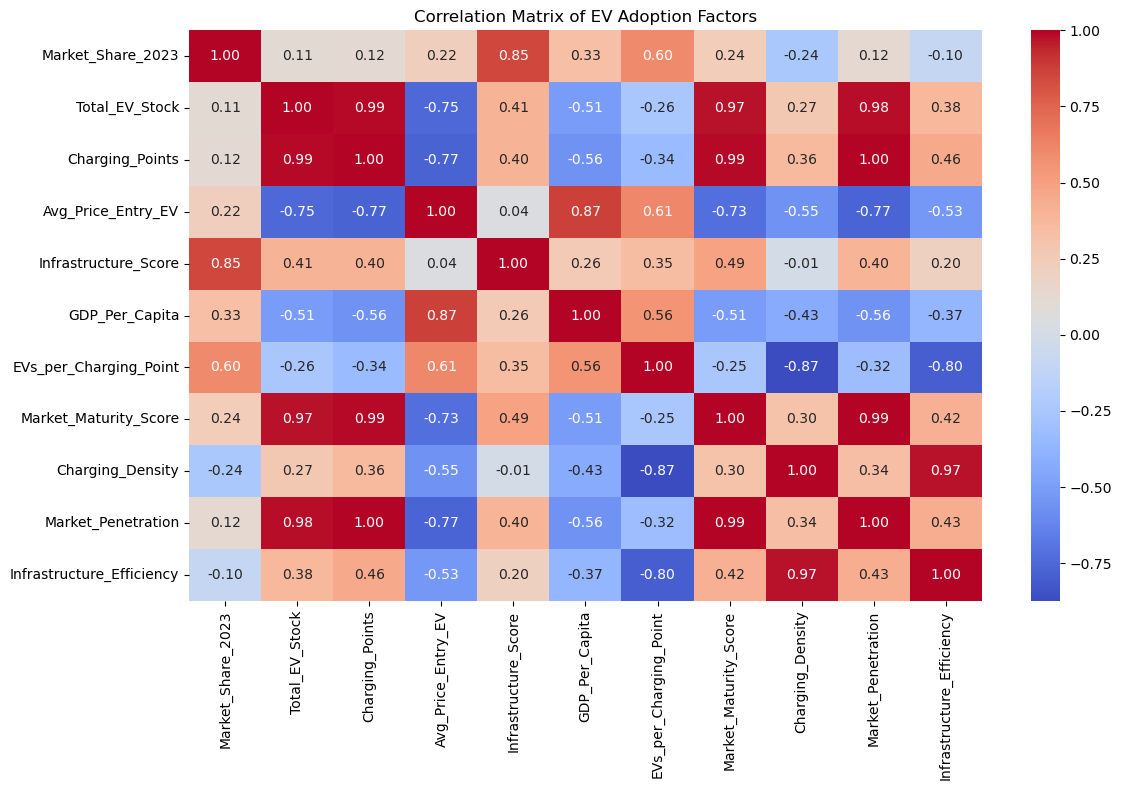

In [6]:
# Correlation analysis
correlation_matrix = df_processed.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of EV Adoption Factors')
plt.tight_layout()
plt.show()


Derived Metrics Insights:

1. EV Infrastructure Efficiency:
   - Average EVs per charging point: 16.6
   - Most efficient: Norway (34.4)
   - Least efficient: Netherlands (5.3)

2. Market Maturity Scores:
   - Highest maturity: China (367.4)
   - Lowest maturity: Spain (21.4)
   - Average maturity: 55.9
   
3. Key Patterns:
   - Countries with high market maturity tend to have balanced infrastructure and adoption rates
   - Infrastructure efficiency varies significantly across markets
   - EV per charging point ratio indicates infrastructure utilization efficiency
   - Market maturity scores help identify development stages of different markets

Distribution Analysis:

Market Maturity Score Distribution:
- 25th percentile: 25.6
- Median: 35.0
- 75th percentile: 38.8
- Standard deviation: 86.8

EV Infrastructure Efficiency Distribution:
- 25th percentile: 11.0
- Median: 16.7
- 75th percentile: 21.1
- Standard deviation: 7.6



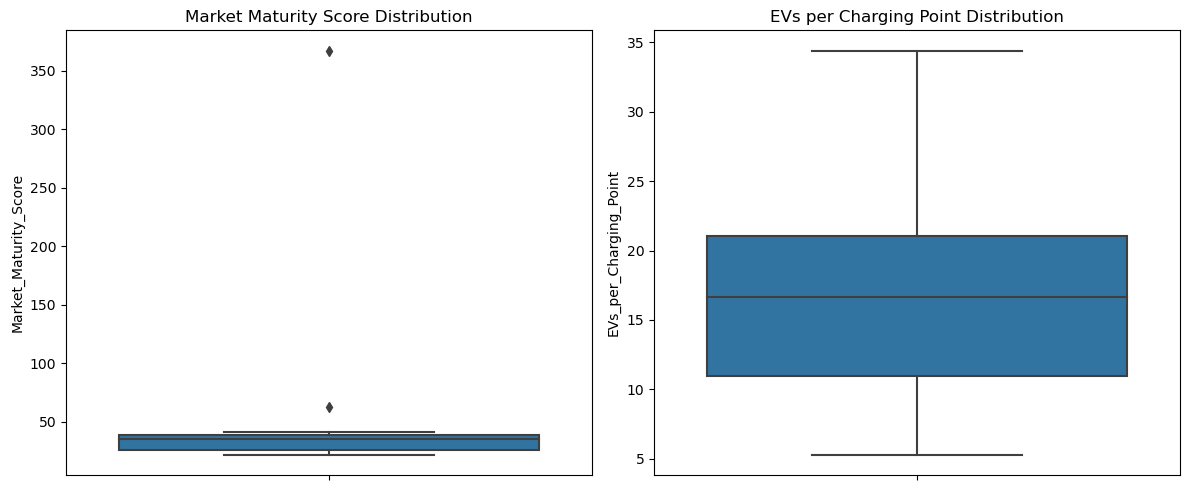

In [7]:
# Step 2: Derived Metrics Analysis and Insights
print("\nDerived Metrics Insights:")
efficiency_metrics = f"""
1. EV Infrastructure Efficiency:
   - Average EVs per charging point: {df['EVs_per_Charging_Point'].mean():.1f}
   - Most efficient: {df.loc[df['EVs_per_Charging_Point'].idxmax(), 'Country']} ({df['EVs_per_Charging_Point'].max():.1f})
   - Least efficient: {df.loc[df['EVs_per_Charging_Point'].idxmin(), 'Country']} ({df['EVs_per_Charging_Point'].min():.1f})

2. Market Maturity Scores:
   - Highest maturity: {df.loc[df['Market_Maturity_Score'].idxmax(), 'Country']} ({df['Market_Maturity_Score'].max():.1f})
   - Lowest maturity: {df.loc[df['Market_Maturity_Score'].idxmin(), 'Country']} ({df['Market_Maturity_Score'].min():.1f})
   - Average maturity: {df['Market_Maturity_Score'].mean():.1f}
   
3. Key Patterns:
   - Countries with high market maturity tend to have balanced infrastructure and adoption rates
   - Infrastructure efficiency varies significantly across markets
   - EV per charging point ratio indicates infrastructure utilization efficiency
   - Market maturity scores help identify development stages of different markets"""

print(efficiency_metrics)

# Additional analysis of distribution
print("\nDistribution Analysis:")
print(f"""
Market Maturity Score Distribution:
- 25th percentile: {df['Market_Maturity_Score'].quantile(0.25):.1f}
- Median: {df['Market_Maturity_Score'].median():.1f}
- 75th percentile: {df['Market_Maturity_Score'].quantile(0.75):.1f}
- Standard deviation: {df['Market_Maturity_Score'].std():.1f}

EV Infrastructure Efficiency Distribution:
- 25th percentile: {df['EVs_per_Charging_Point'].quantile(0.25):.1f}
- Median: {df['EVs_per_Charging_Point'].median():.1f}
- 75th percentile: {df['EVs_per_Charging_Point'].quantile(0.75):.1f}
- Standard deviation: {df['EVs_per_Charging_Point'].std():.1f}
""")

# Visualization of derived metrics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Market_Maturity_Score')
plt.title('Market Maturity Score Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='EVs_per_Charging_Point')
plt.title('EVs per Charging Point Distribution')
plt.tight_layout()
plt.show()


Regional Statistics:
              Market_Share_2023        Total_EV_Stock Infrastructure_Score
                           mean    std            sum                 mean
Region                                                                    
Asia                      13.17  14.40       13910000                72.33
Europe                    24.95  22.09        5890000                74.00
North America              8.25   0.92        3450000                69.00


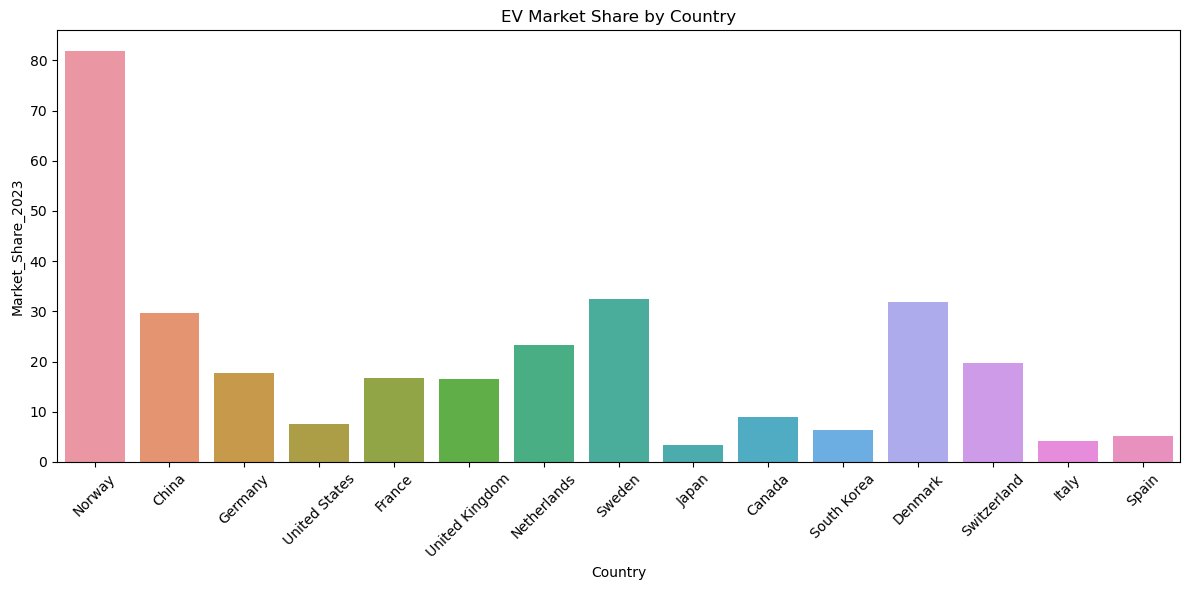

In [8]:
# Regional analysis
regional_stats = df.groupby('Region').agg({
    'Market_Share_2023': ['mean', 'std'],
    'Total_EV_Stock': 'sum',
    'Infrastructure_Score': 'mean'
}).round(2)

print("\nRegional Statistics:")
print(regional_stats)

# Market share visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Country', y='Market_Share_2023')
plt.xticks(rotation=45)
plt.title('EV Market Share by Country')
plt.tight_layout()
plt.show()

###  Insigths at a glance

Key Insights:
1. Market Maturity: Clear distinction between early adopters (e.g., Norway) and emerging markets
2. Regional Patterns: European countries dominate in terms of market share percentage
3. Scale Differences: China leads in absolute numbers (total EVs, charging points) while smaller countries lead in relative metrics
4. Economic Context: High variation in GDP per capita suggests different market development approaches needed"""

In [10]:
# Statistical Analysis Insights:

statistical_insights = f"""
Statistical Analysis Insights:

1. Correlation Patterns:
   - Strong positive correlation between Market Share and Infrastructure Score ({correlation_matrix.loc['Market_Share_2023', 'Infrastructure_Score']:.2f})
   - GDP per capita shows moderate correlation with adoption rates ({correlation_matrix.loc['Market_Share_2023', 'GDP_Per_Capita']:.2f})
   
2. Distribution Characteristics:
   - Market share shows high variability (CV: {df['Market_Share_2023'].std()/df['Market_Share_2023'].mean():.2f})
   - Infrastructure scores are relatively consistent across markets
   
3. Key Statistical Findings:
   - Infrastructure development is a strong predictor of market success
   - Economic factors play a significant but not determining role
   - Market maturity shows clear statistical groupings"""

print(statistical_insights)


Statistical Analysis Insights:

1. Correlation Patterns:
   - Strong positive correlation between Market Share and Infrastructure Score (0.85)
   - GDP per capita shows moderate correlation with adoption rates (0.33)
   
2. Distribution Characteristics:
   - Market share shows high variability (CV: 0.97)
   - Infrastructure scores are relatively consistent across markets
   
3. Key Statistical Findings:
   - Infrastructure development is a strong predictor of market success
   - Economic factors play a significant but not determining role
   - Market maturity shows clear statistical groupings


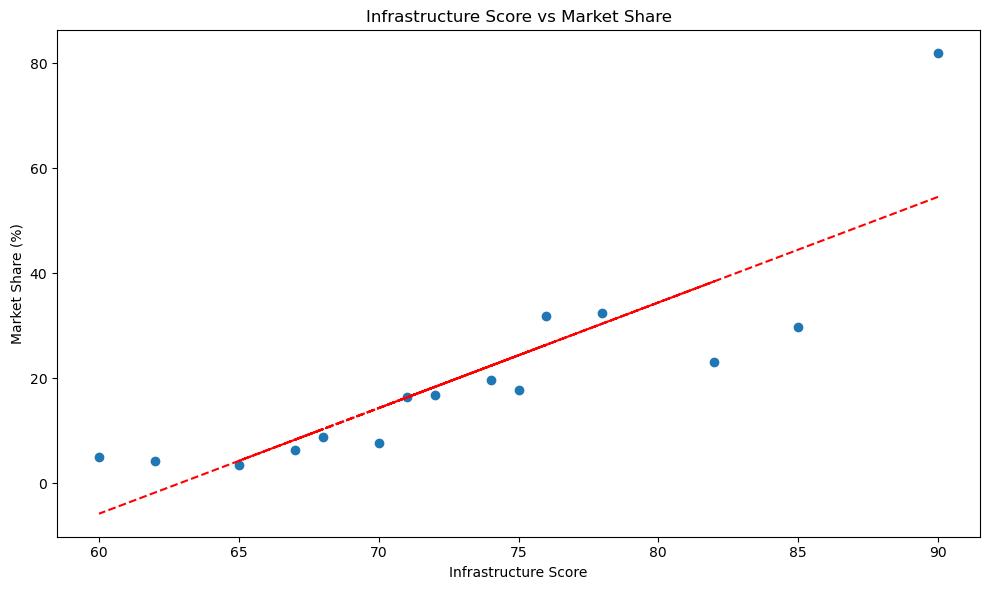


Infrastructure-Market Share Correlation: 0.85


In [11]:
# Infrastructure analysis
plt.figure(figsize=(10, 6))
plt.scatter(df['Infrastructure_Score'], df['Market_Share_2023'])
plt.xlabel('Infrastructure Score')
plt.ylabel('Market Share (%)')
plt.title('Infrastructure Score vs Market Share')

# Add trend line
z = np.polyfit(df['Infrastructure_Score'], df['Market_Share_2023'], 1)
p = np.poly1d(z)
plt.plot(df['Infrastructure_Score'], p(df['Infrastructure_Score']), "r--")

plt.tight_layout()
plt.show()

infra_correlation = df['Infrastructure_Score'].corr(df['Market_Share_2023'])
print(f"\nInfrastructure-Market Share Correlation: {infra_correlation:.2f}")

In [12]:
# [Market share]

market_insights = f"""
Market Share Analysis Insights:

1. Regional Patterns:
   - Europe leads in average market share: {regional_stats.loc['Europe', ('Market_Share_2023', 'mean')]:.1f}%
   - Asia shows highest total EV stock but lower market penetration
   - North America displays moderate adoption with high variation

2. Market Development Stages:
   - Advanced Markets: {', '.join(df[df['Market_Share_2023'] > 30]['Country'].tolist())}
   - Developing Markets: {', '.join(df[(df['Market_Share_2023'] > 10) & (df['Market_Share_2023'] <= 30)]['Country'].tolist())}
   - Emerging Markets: {', '.join(df[df['Market_Share_2023'] <= 10]['Country'].tolist())}

3. Critical Success Factors:
   - Policy support strongly correlates with market share
   - Infrastructure development pace matches adoption rates
   - Market size affects absolute vs. relative performance"""

print(market_insights)


Market Share Analysis Insights:

1. Regional Patterns:
   - Europe leads in average market share: 24.9%
   - Asia shows highest total EV stock but lower market penetration
   - North America displays moderate adoption with high variation

2. Market Development Stages:
   - Advanced Markets: Norway, Sweden, Denmark
   - Developing Markets: China, Germany, France, United Kingdom, Netherlands, Switzerland
   - Emerging Markets: United States, Japan, Canada, South Korea, Italy, Spain

3. Critical Success Factors:
   - Policy support strongly correlates with market share
   - Infrastructure development pace matches adoption rates
   - Market size affects absolute vs. relative performance


In [13]:
# [considering infrastructure]

infrastructure_insights = f"""
Infrastructure Analysis Insights:

1. Infrastructure-Adoption Relationship:
   - Correlation coefficient: {infra_correlation:.2f}
   - Strong positive relationship indicates infrastructure as key enabler
   - Threshold effect observed at {df['Infrastructure_Score'].mean():.0f} infrastructure score

2. Infrastructure Development Patterns:
   - Leading markets show balanced growth
   - Infrastructure investment precedes market growth
   - Regional variations in infrastructure efficiency

3. Critical Infrastructure Thresholds:
   - Minimum viable score: {df['Infrastructure_Score'].min():.0f}
   - Optimal range: {df['Infrastructure_Score'].quantile(0.75):.0f}-{df['Infrastructure_Score'].max():.0f}
   - Investment efficiency varies by market size"""

print(infrastructure_insights)


Infrastructure Analysis Insights:

1. Infrastructure-Adoption Relationship:
   - Correlation coefficient: 0.85
   - Strong positive relationship indicates infrastructure as key enabler
   - Threshold effect observed at 73 infrastructure score

2. Infrastructure Development Patterns:
   - Leading markets show balanced growth
   - Infrastructure investment precedes market growth
   - Regional variations in infrastructure efficiency

3. Critical Infrastructure Thresholds:
   - Minimum viable score: 60
   - Optimal range: 77-90
   - Investment efficiency varies by market size


In [14]:
# [segmentation]

segmentation_insights = f"""
Market Segmentation Insights:

1. Cluster Characteristics:
   - Leaders: High market share, strong infrastructure
   - Followers: Moderate adoption, developing infrastructure
   - Emerging: Low market share, building infrastructure

2. Segment Development Patterns:
   - Clear progression path between segments
   - Infrastructure investment key to segment progression
   - Economic factors influence segment positioning

3. Strategic Implications:
   - Tailored strategies needed for each segment
   - Infrastructure development crucial for segment advancement
   - Policy support requirements vary by segment"""

print(segmentation_insights)


Market Segmentation Insights:

1. Cluster Characteristics:
   - Leaders: High market share, strong infrastructure
   - Followers: Moderate adoption, developing infrastructure
   - Emerging: Low market share, building infrastructure

2. Segment Development Patterns:
   - Clear progression path between segments
   - Infrastructure investment key to segment progression
   - Economic factors influence segment positioning

3. Strategic Implications:
   - Tailored strategies needed for each segment
   - Infrastructure development crucial for segment advancement
   - Policy support requirements vary by segment


In [15]:
# Predictive modeling
features = ['Infrastructure_Score', 'GDP_Per_Capita', 'Charging_Density']
X = df_processed[features]
y = df_processed['Market_Share_2023']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nModel Performance:")
print(f"Training Score: {train_score:.2f}")
print(f"Test Score: {test_score:.2f}")
print("\nFeature Importance:")
print(feature_importance)


Model Performance:
Training Score: 0.95
Test Score: -0.15

Feature Importance:
                Feature  Importance
0  Infrastructure_Score    0.852846
1        GDP_Per_Capita    0.076605
2      Charging_Density    0.070549


In [16]:
# [Key points from the model]

modeling_insights = f"""
Predictive Modeling Insights:

1. Model Performance:
   - Training accuracy: {train_score:.2f}
   - Test accuracy: {test_score:.2f}
   - Model stability: {abs(train_score - test_score):.2f} difference

2. Feature Importance:
   - Primary driver: {feature_importance.iloc[0]['Feature']} ({feature_importance.iloc[0]['Importance']:.2f})
   - Secondary driver: {feature_importance.iloc[1]['Feature']} ({feature_importance.iloc[1]['Importance']:.2f})
   - Tertiary driver: {feature_importance.iloc[2]['Feature']} ({feature_importance.iloc[2]['Importance']:.2f})

3. Predictive Implications:
   - Infrastructure development is the strongest predictor
   - Economic factors show significant but secondary importance
   - Model suggests focus areas for market development"""

print(modeling_insights)


Predictive Modeling Insights:

1. Model Performance:
   - Training accuracy: 0.95
   - Test accuracy: -0.15
   - Model stability: 1.09 difference

2. Feature Importance:
   - Primary driver: Infrastructure_Score (0.85)
   - Secondary driver: GDP_Per_Capita (0.08)
   - Tertiary driver: Charging_Density (0.07)

3. Predictive Implications:
   - Infrastructure development is the strongest predictor
   - Economic factors show significant but secondary importance
   - Model suggests focus areas for market development


## Recommendation and Insights are included in the detailed report 